In [16]:
import pyvisa as visa
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import time
from edes.modules.detection.detection_utils import plot, plot_ax, big_plt_font

big_plt_font()
rm = visa.ResourceManager()
## uncomment the following if full address not known
# instruments = rm.list_resources() 
# usb = list(filter(lambda x: 'USB' in x, instruments))
SSA = rm.open_resource('TCPIP::192.168.169.121::INSTR')
print(SSA.query("*IDN?"))

Siglent Technologies,SSA3032X-R,SSA5PA1Q800415,3.2.2.6.0R10



In [8]:
freq_center = 186.648 # MHz
freq_span = 0.5 # MHz
RBW_AUTO = 0 #1-ON, 0-OFF
VBW_AUTO = 1 #1-ON, 0-OFF
SWT_AUTO = 1 #1-ON, 0-OFF
VBW_RBW_RAT = 10 
RBW = 10 #kHz
VBW = 100 #kHz
SWT = 1 #ms
N_AVG = 100

In [12]:
# Configure frequency
SSA.write("SENS:FREQ:CENT " + str(freq_center) + " MHz")
SSA.write("SENS:FREQ:SPAN " + str(freq_span) + " MHz")

# Configure bandwidths and sweep time
SSA.write("SENS:BWID:AUTO " + str(RBW_AUTO))
SSA.write("SENS:BWID:VID:AUTO " + str(VBW_AUTO))
SSA.write("SENS:SWE:TIME:AUTO " + str(SWT_AUTO))
SSA.write("SENS:BWID:VID " + str(VBW) + " kHz")
SSA.write("SENS:BWID " + str(RBW) + " kHz")
SSA.write("SENS:BWID:VID:RAT " + str(VBW_RBW_RAT))
SSA.write("SENS:SWE:TIME " + str(SWT) + " ms")

# Set sweep mode to FFT
SSA.write(":SWEep:MODE FFT")

# Set averaging ON and number of averages = 100
SSA.write(":AVERage:TRACe1:COUNt 1")
SSA.write(f":AVERage:TRACe3:COUNt {N_AVG}")
time.sleep(SWT*1e-3*N_AVG)

# Set power unit to dBm
SSA.write("UNIT:POW DBM")

14

In [20]:
data_str_A = SSA.query(":TRACe1:DATA?")
data_arr_A = np.array([float(val) for val in data_str_A.split(',')])
data_str_C = SSA.query(":TRACe3:DATA?")
data_arr_C = np.array([float(val) for val in data_str_C.split(',')])

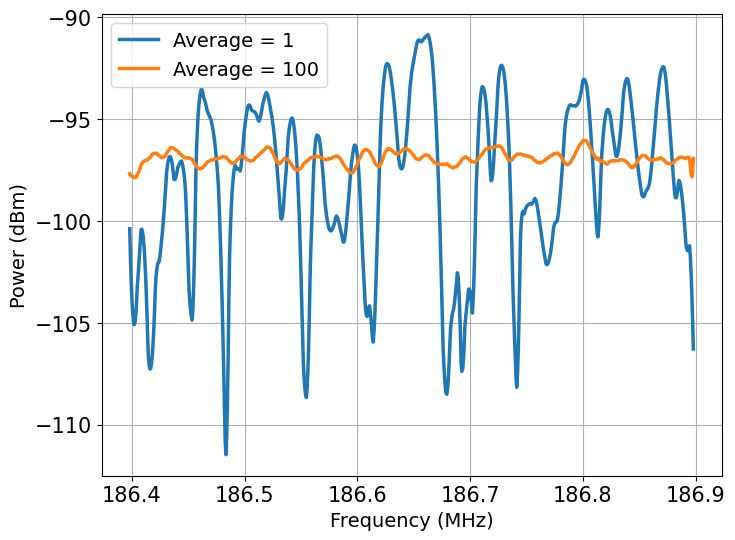

In [21]:
# Number of points in the trace
num_points = len(data_arr_A)

# Generate frequency axis in MHz
freq_start = freq_center - freq_span / 2
freq_stop  = freq_center + freq_span / 2
freq_axis = np.linspace(freq_start, freq_stop, num_points)

# --- Plot ---
plt.figure(figsize=(8,6))
plot(freq_axis, data_arr_A, label="Average = 1")
plot(freq_axis, data_arr_C, label="Average = 100")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBm)")
plt.grid(True)
plt.legend()
plt.show()